In [1]:
path = './results/cifar10_rere_lrp_ablation_acc_drop'

In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stdout-2025-01-21-08-33.txt',
 'args-2025-01-21-14-03.txt',
 'stderr-2025-01-21-07-05.txt',
 'stderr-2025-01-21-08-33.txt',
 'args-2025-01-21-10-04.txt',
 'args-2025-01-21-16-43.txt',
 'args-2025-01-21-17-56.txt',
 'raw_log-2025-01-21-08-33.txt',
 'stderr-2025-01-21-14-03.txt',
 'raw_log-2025-01-21-14-03.txt',
 'args-2025-01-21-12-47.txt',
 'stderr-2025-01-21-17-56.txt',
 'stderr-2025-01-21-16-43.txt',
 'stdout-2025-01-21-11-27.txt',
 'raw_log-2025-01-21-15-19.txt',
 'args-2025-01-21-11-27.txt',
 'stderr-2025-01-21-10-04.txt',
 'stderr-2025-01-21-15-19.txt',
 'stdout-2025-01-21-17-56.txt',
 'stderr-2025-01-21-12-47.txt',
 'stdout-2025-01-21-14-03.txt',
 'stdout-2025-01-21-07-05.txt',
 'stdout-2025-01-21-12-47.txt',
 'raw_log-2025-01-21-11-27.txt',
 'raw_log-2025-01-21-10-04.txt',
 'stdout-2025-01-21-15-19.txt',
 'stderr-2025-01-21-11-27.txt',
 'args-2025-01-21-15-19.txt',
 'stdout-2025-01-21-16-43.txt',
 'raw_log-2025-01-21-16-43.txt',
 'raw_log-2025-01-21-12-47.txt',
 'args-2025-01-

In [3]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-21-14-03.txt',
 'args-2025-01-21-10-04.txt',
 'args-2025-01-21-16-43.txt',
 'args-2025-01-21-17-56.txt',
 'args-2025-01-21-12-47.txt',
 'args-2025-01-21-11-27.txt',
 'args-2025-01-21-15-19.txt',
 'args-2025-01-21-08-33.txt',
 'args-2025-01-21-07-05.txt']

In [4]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-21-14-03.txt': {'acc_drop': 5.0,
  'approach': 'rere_lrp',
  'batch_size': 512,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['cifar10'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'ablation_acc_drop',
  'feature_selection_mean': True,
  'features_saved': 40,
  'fix_bn': True,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.1,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'vgg11',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 153,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositories/FACIL/

In [5]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-21-08-33.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 0.693799801826477},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 50.0},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 0.1},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 0.6200031523704529},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 72.0},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-21-08-33',
   'value': 0.1},
  {'group':

In [6]:
import pandas as pd
from itertools import chain
import numpy as np
data = pd.DataFrame({'Name': list(chain.from_iterable([[key for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Accuracy Drop': list(chain.from_iterable([[int(arg_dict[key]['acc_drop']) for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_29604/302595142.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data, hue='Accuracy Drop', x='Task', y='Accuracy', palette=paletter, ci=None)
/tmp/ipykernel_29604/302595142.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  g = sns.lineplot( data, hue='Accuracy Drop', x='Task', y='Accuracy', palette=paletter, ci=None)


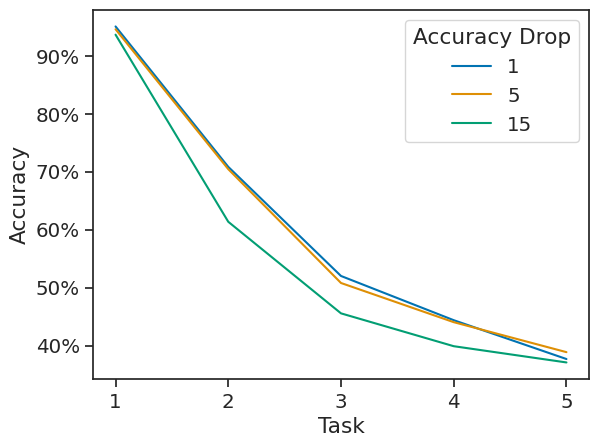

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data, hue='Accuracy Drop', x='Task', y='Accuracy', palette=paletter, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("ablation_accuracy.pdf", format='pdf', bbox_inches='tight')

In [8]:
path = './results/cifar10_rere_lrp_ablation_exemplar_num'

In [9]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stdout-2025-01-20-10-37.txt',
 'stderr-2025-01-20-19-30.txt',
 'args-2025-01-31-08-05.txt',
 'raw_log-2025-01-20-13-30.txt',
 'args-2025-01-21-03-47.txt',
 'stdout-2025-01-21-02-05.txt',
 'stderr-2025-01-21-02-05.txt',
 'args-2025-01-31-10-20.txt',
 'stdout-2025-01-31-08-05.txt',
 'raw_log-2025-01-31-09-13.txt',
 'args-2025-01-21-00-26.txt',
 'stdout-2025-01-20-14-57.txt',
 'stdout-2025-01-31-09-13.txt',
 'args-2025-01-20-21-10.txt',
 'stderr-2025-01-20-12-03.txt',
 'stderr-2025-01-20-13-30.txt',
 'stderr-2025-01-31-12-42.txt',
 'stdout-2025-01-21-00-26.txt',
 'stdout-2025-01-20-19-30.txt',
 'stderr-2025-01-31-08-05.txt',
 'args-2025-01-20-18-05.txt',
 'raw_log-2025-01-20-18-05.txt',
 'args-2025-01-20-14-57.txt',
 'stderr-2025-01-20-18-05.txt',
 'stdout-2025-01-20-16-33.txt',
 'args-2025-01-20-10-37.txt',
 'stderr-2025-01-31-10-20.txt',
 'args-2025-01-31-13-52.txt',
 'raw_log-2025-01-31-11-25.txt',
 'raw_log-2025-01-31-08-05.txt',
 'stderr-2025-01-20-16-33.txt',
 'stderr-2025-01-21-0

In [10]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-31-08-05.txt',
 'args-2025-01-21-03-47.txt',
 'args-2025-01-31-10-20.txt',
 'args-2025-01-21-00-26.txt',
 'args-2025-01-20-21-10.txt',
 'args-2025-01-20-18-05.txt',
 'args-2025-01-20-14-57.txt',
 'args-2025-01-20-10-37.txt',
 'args-2025-01-31-13-52.txt',
 'args-2025-01-31-12-42.txt',
 'args-2025-01-20-19-30.txt',
 'args-2025-01-20-16-33.txt',
 'args-2025-01-31-11-25.txt',
 'args-2025-01-31-09-13.txt',
 'args-2025-01-21-02-05.txt',
 'args-2025-01-20-12-03.txt',
 'args-2025-01-20-13-30.txt',
 'args-2025-01-20-22-45.txt']

In [11]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-31-08-05.txt': {'acc_drop': 5.0,
  'approach': 'rere_lrp',
  'batch_size': 512,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['cifar10'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'ablation_exemplar_num',
  'feature_selection_mean': True,
  'features_saved': 40,
  'fix_bn': True,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.1,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'vgg11',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 76,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositories/FAC

In [12]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-20-13-30.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 0.6813902606964112},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 50.0},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 0.1},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 0.6251613807678222},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 65.60000000000001},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 5},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-20-13-30',
   'value': 0.1

In [13]:
import pandas as pd
from itertools import chain
import numpy as np
data = pd.DataFrame({'Name': list(chain.from_iterable([[key for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Exemplar Number': list(chain.from_iterable([[int(arg_dict[key]['num_exemplars_per_class']) for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_29604/2802114352.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data, hue='Exemplar Number', x='Task', y='Accuracy', palette=paletter, ci=None)


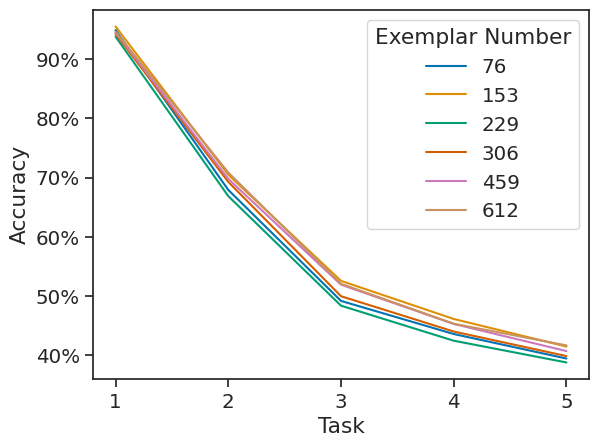

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data, hue='Exemplar Number', x='Task', y='Accuracy', palette=paletter, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("ablation_exemplar.pdf", format='pdf', bbox_inches='tight')

In [15]:
path = './results/cifar10_rere_lrp_ablation_feature_num'

In [16]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['stdout-2025-01-20-07-35.txt',
 'stderr-2025-01-20-05-04.txt',
 'stderr-2025-01-20-07-35.txt',
 'args-2025-01-20-03-49.txt',
 'args-2025-01-19-18-18.txt',
 'stdout-2025-01-20-01-21.txt',
 'raw_log-2025-01-19-22-38.txt',
 'stderr-2025-01-20-06-19.txt',
 'args-2025-01-19-19-44.txt',
 'raw_log-2025-01-20-05-04.txt',
 'stderr-2025-01-19-18-18.txt',
 'raw_log-2025-01-19-18-18.txt',
 'args-2025-01-20-06-19.txt',
 'raw_log-2025-01-20-03-49.txt',
 'raw_log-2025-01-20-01-21.txt',
 'stderr-2025-01-20-01-21.txt',
 'stdout-2025-01-20-03-49.txt',
 'stderr-2025-01-31-19-42.txt',
 'stderr-2025-01-20-03-49.txt',
 'raw_log-2025-01-20-08-58.txt',
 'stdout-2025-01-20-08-58.txt',
 'stdout-2025-01-19-22-38.txt',
 'stdout-2025-01-20-06-19.txt',
 'args-2025-01-20-07-35.txt',
 'stdout-2025-01-19-21-11.txt',
 'stdout-2025-01-19-18-18.txt',
 'raw_log-2025-01-19-19-44.txt',
 'stdout-2025-01-20-00-05.txt',
 'stdout-2025-01-19-19-44.txt',
 'stderr-2025-01-20-02-31.txt',
 'raw_log-2025-01-20-07-35.txt',
 'raw_log-

In [17]:
args = [file for file in onlyfiles if 'args' in file ]
args

['args-2025-01-20-03-49.txt',
 'args-2025-01-19-18-18.txt',
 'args-2025-01-19-19-44.txt',
 'args-2025-01-20-06-19.txt',
 'args-2025-01-20-07-35.txt',
 'args-2025-01-19-21-11.txt',
 'args-2025-01-31-18-32.txt',
 'args-2025-01-20-00-05.txt',
 'args-2025-01-19-22-38.txt',
 'args-2025-01-20-02-31.txt',
 'args-2025-01-20-05-04.txt',
 'args-2025-01-20-08-58.txt',
 'args-2025-01-20-01-21.txt',
 'args-2025-01-31-19-42.txt',
 'args-2025-01-31-20-53.txt']

In [18]:
import json
arg_dict = {}
for file in args:
    with open(join(path, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())
arg_dict

{'2025-01-20-03-49.txt': {'acc_drop': 5.0,
  'approach': 'rere_lrp',
  'batch_size': 512,
  'clipping': 10000,
  'context_detection_layer': None,
  'context_detector_canonizer': 'epsilon_plus_flat',
  'datasets': ['cifar10'],
  'eval_on_train': False,
  'exemplar_selection': 'herding',
  'exp_name': 'ablation_feature_num',
  'feature_selection_mean': True,
  'features_saved': 60.0,
  'fix_bn': True,
  'gpu': 0,
  'gridsearch_tasks': -1,
  'keep_existing_head': False,
  'last_layer_analysis': False,
  'log': ['disk'],
  'lr': 0.1,
  'lr_factor': 3,
  'lr_min': 0.0001,
  'lr_patience': 5,
  'momentum': 0.0,
  'multi_softmax': False,
  'nc_first_task': None,
  'nepochs': 200,
  'network': 'vgg11',
  'no_cudnn_deterministic': False,
  'num_exemplars': 0,
  'num_exemplars_per_class': 153,
  'num_tasks': 5,
  'num_trees': 300,
  'num_workers': 4,
  'pin_memory': False,
  'pretrained': False,
  'pruning_canonizer': 'epsilon_plus_flat',
  'results_path': '/home/karokaro/research-repositories/F

In [19]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))
res_dict

{'2025-01-19-22-38.txt': [{'group': 'valid',
   'iter': 1,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 0.6526879920959473},
  {'group': 'valid',
   'iter': 1,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 68.60000000000001},
  {'group': 'train',
   'iter': 1,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 5},
  {'group': 'train',
   'iter': 1,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 0.1},
  {'group': 'valid',
   'iter': 2,
   'name': 'loss',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 0.6797397141456604},
  {'group': 'valid',
   'iter': 2,
   'name': 'acc',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 50.0},
  {'group': 'train',
   'iter': 2,
   'name': 'patience',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 4},
  {'group': 'train',
   'iter': 2,
   'name': 'lr',
   'task': 0,
   'time': '2025-01-19-22-38',
   'value': 0.1

In [20]:
import pandas as pd
from itertools import chain
import numpy as np
data = pd.DataFrame({'Name': list(chain.from_iterable([[key for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Feature Number': list(chain.from_iterable([[int(arg_dict[key]['features_saved']) for i in res_dict[key] if i["name"]=="pruned"] for key in res_dict.keys()])), 
                     'Task': list(chain.from_iterable([[j for j in range(len([k for k in res_dict[key] if k["name"]=="pruned"]))] for key in res_dict.keys()])),
                     'Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()]))})

/tmp/ipykernel_29604/3299965191.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data, hue='Feature Number', x='Task', y='Accuracy', palette=paletter, ci=None)
/tmp/ipykernel_29604/3299965191.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot( data, hue='Feature Number', x='Task', y='Accuracy', palette=paletter, ci=None)


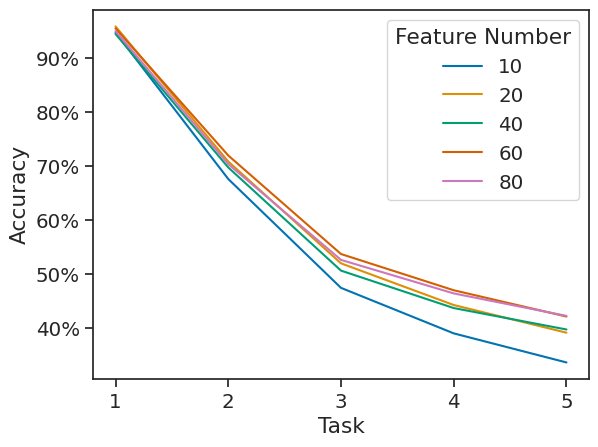

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data, hue='Feature Number', x='Task', y='Accuracy', palette=paletter, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("ablation_feature.pdf", format='pdf', bbox_inches='tight')